#--------------------------#
#1. Contour plot and 2. Heatmap
#--------------------------#

Please download the file Homework_sampledata1.txt from here (it is the same file from last week):

https://drive.google.com/file/d/1rjfXnAh_LT0zwidF40UTM8bP9_7BAI9O/view?usp=sharing

In this file, the first line show the year of the observation. Then, each row is the number of days in months, from days 1 to days 31, each column is a month, from January to December.

In short, we have daily value of an observation from 01 Jan 2008 to 31 Dec 2008.

**Draw the contour and heatmap of temperature in 2008**

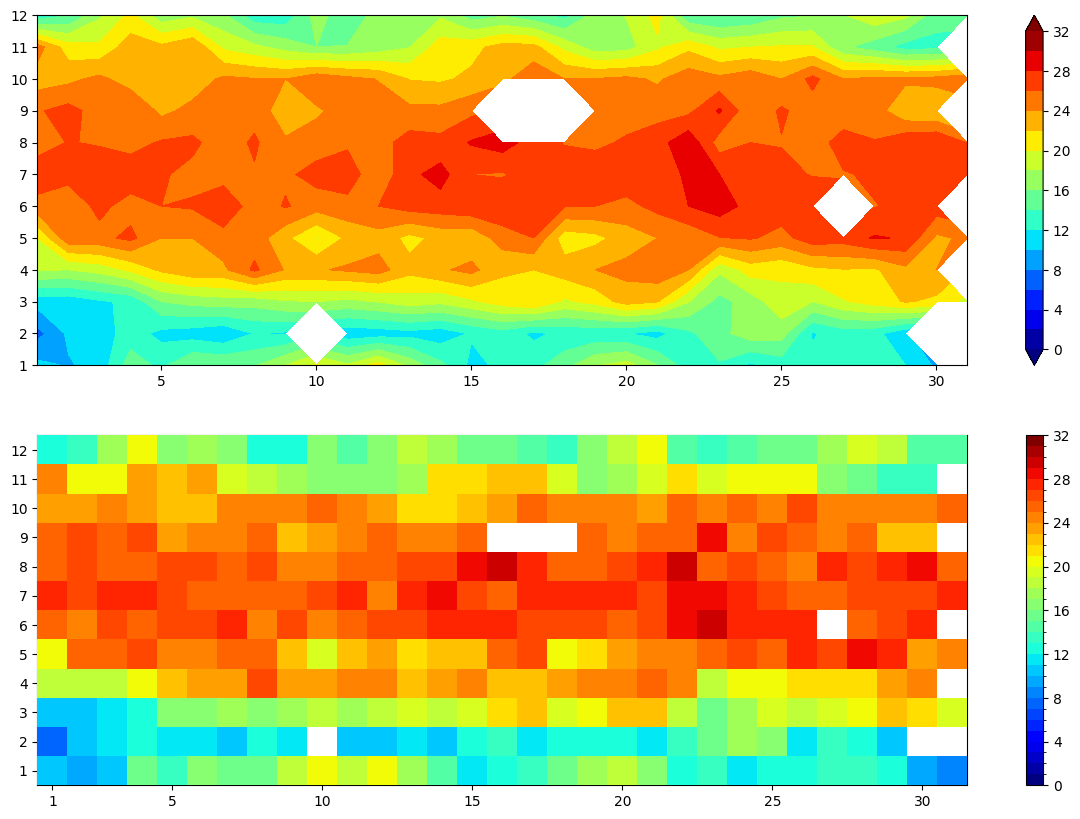

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Data Visualization/Homework_sampledata_1.txt'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#--------------------------#
#1. Contour plot and 2. Heatmap
#--------------------------#
import csv
#blah blah
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Specify the path to your output text file
output_file_path = "your_output_file.txt"

# Read the input file, remove the first column, and write to the output file
with open(file_path, 'r') as input_file, open(output_file_path, 'w') as output_file:
    for line in input_file:
        # Split the line by whitespace (assuming columns are separated by spaces)
        columns = line.split()

        # Exclude the first column (index 0) and join the remaining columns back into a line
        modified_line = ' '.join(columns[1:])

        # Write the modified line to the output file
        output_file.write(modified_line + '\n')

print("First column removed and saved to", output_file_path)




First column removed and saved to your_output_file.txt


<ipython-input-11-60be9701e19b>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  contour = plt.contourf(X, Y, data_transposed, cmap=plt.cm.get_cmap('jet',32), levels=np.arange(custom_vmin, custom_vmax,2),extend="both")


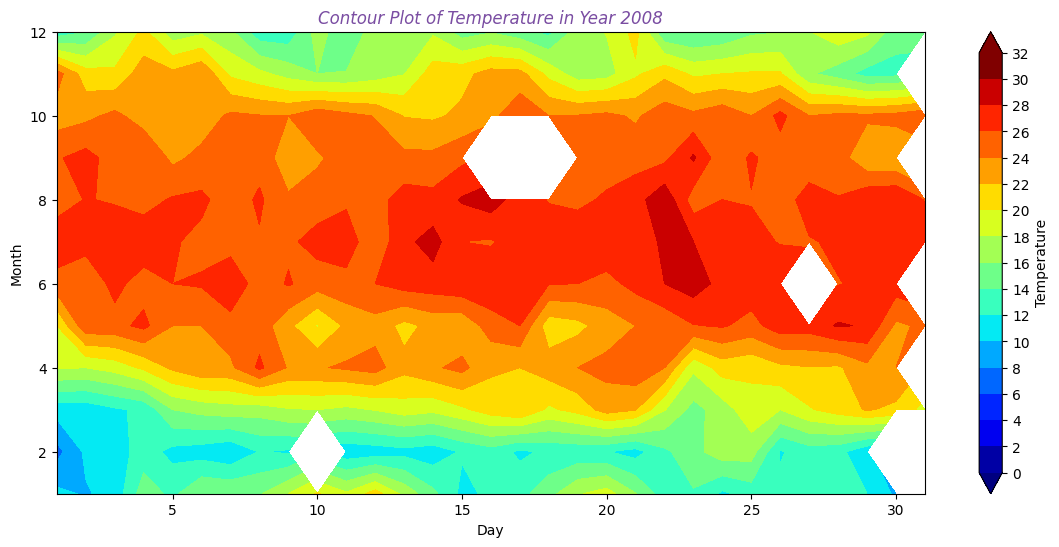

In [ ]:
custom_vmin = 0
custom_vmax = 34
ticks=np.arange(custom_vmin, custom_vmax, 2)
data = np.genfromtxt(output_file_path, skip_header=0)  # Change skip_header if needed

# Replace any -99.0 values with NaN
data[data == -99.0] = np.nan
data_transposed = data.T


# Create X and Y coordinates for the rotated contour plot
y = np.arange(1, 13)  # Months on the y-axis
x = np.arange(1, 32)  # Temperature on the x-axis
X, Y = np.meshgrid(x, y)

# Create the rotated contour plot
plt.figure(figsize=(14, 6))

contour = plt.contourf(X, Y, data_transposed, cmap=plt.cm.get_cmap('jet',32), levels=np.arange(custom_vmin, custom_vmax,2),extend="both")
cbar = plt.colorbar(contour, label='Temperature', ticks=np.arange(custom_vmin, custom_vmax,2))
plt.title('Contour Plot of Temperature in Year 2008',fontstyle='italic',fontsize=12,color='#7a4da2')
plt.xlabel('Day')
plt.ylabel('Month')
plt.show()




<ipython-input-12-90da3874abb1>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.pcolormesh(X,Y, data_transposed, cmap=plt.cm.get_cmap('jet', 33),norm=norm)


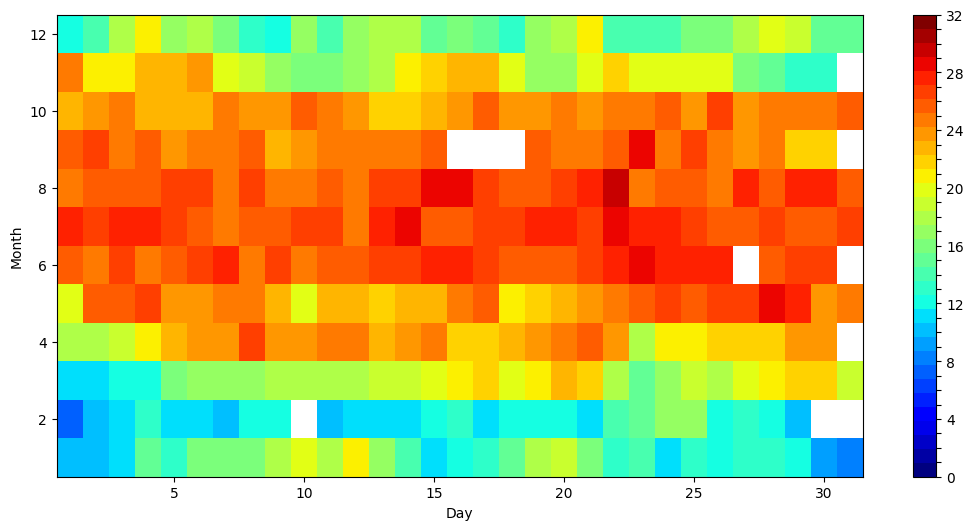

In [ ]:
#subplot 2
num_levels = 33
ticks=np.arange(0,33)
norm = plt.Normalize(0, num_levels - 1)
plt.figure(figsize=(13, 6))
plt.pcolormesh(X,Y, data_transposed, cmap=plt.cm.get_cmap('jet', 33),norm=norm)
cbar1=plt.colorbar(ticks=np.arange(0, 33))
tick_labels=[str(tick) if tick %4 ==0 else '' for tick in ticks]
cbar1.ax.set_yticklabels(tick_labels)
plt.xlabel('Day')
plt.ylabel('Month')
plt.subplots_adjust( wspace = 0.2)
plt.show()

#--------------------------#
#3. Radar chart
#--------------------------#
Let's imagine the data above is a dataset with 12 samples, coresponding to 12 months.
Each sample has 6 features, which is the mean every 5 days.

Feature 1 = mean (day1-day5)

Feature 2 = mean (day6-day10)

Feature 3 = mean (day10-day15)

Feature 4 = mean (day15-day20)

Feature 5 = mean (day20-day25)

Feature 6 = mean (day25-end of months)

**Draw a radar chart for this dataset**

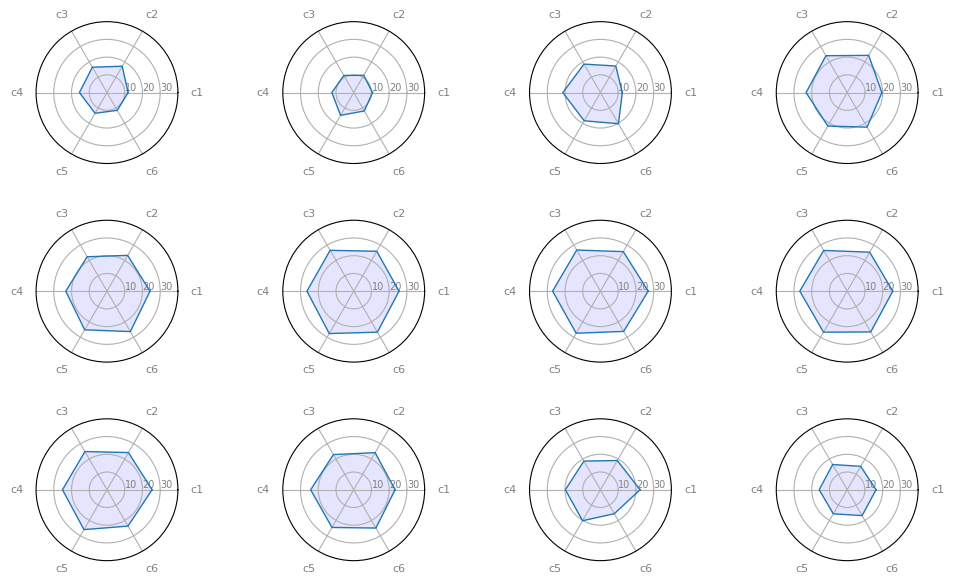

In [ ]:
from math import pi
with open(file_path,'r') as f:
    lines = f.readlines()

temperature_data = []
for line in lines[:]:
    data = line.strip().split()
    temperature_data.extend([float(temp) if temp != '-99.0' else None for temp in data[1:]])

year_temperature= []
for i in range (12):
  monthly_temperature = [temp for temp in temperature_data[i::12] ]
  year_temperature.append(monthly_temperature)

year_temperature_NotNone= []
for i in range (12):
  monthly_temp = [temp for temp in temperature_data[i::12] if temp is not None ]
  year_temperature_NotNone.append(monthly_temp)

data_2 = np.array(year_temperature_NotNone)

feature_means = np.nanmean(data_2, axis=0)
feature_data=[]
for i in range(12):
  monthly_feature=[]
  fea_1=np.mean(data_2[i][0:5])
  fea_2=np.mean(data_2[i][5:10])
  fea_3=np.mean(data_2[i][10:15])
  fea_4=np.mean(data_2[i][15:20])
  fea_5=np.mean(data_2[i][20:25])
  fea_6=np.mean(data_2[i][25:32])
  monthly_feature=[fea_1,fea_2,fea_3,fea_4,fea_5,fea_6]
  feature_data.append(monthly_feature)
feature_data=np.array(feature_data,dtype=float)
print(feature_data)

[[11.92       17.16       16.52       15.54       13.46       11.58333333]
 [10.6        11.14       11.66       11.96       14.96       12.        ]
 [12.32       17.3        18.54       21.24       18.36       20.28333333]
 [19.56       24.24       24.         23.18       21.82       22.52      ]
 [24.26       23.3        22.4        23.24       25.18       26.33333333]
 [25.56       25.98       26.6        26.38       27.62       26.7       ]
 [26.92       25.74       26.78       27.         27.4        26.2       ]
 [25.7        25.38       26.52       26.74       26.72       26.56666667]
 [25.42       24.2        24.88       25.84       24.98       22.15      ]
 [23.34       24.16       22.9        24.3        24.56       24.95      ]
 [22.36       19.02       18.66       19.8        20.18       15.62      ]
 [16.28       15.24       16.42       15.78       15.68       16.83333333]]


<ipython-input-13-3b3b7506a34a>:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data_2 = np.array(year_temperature_NotNone)


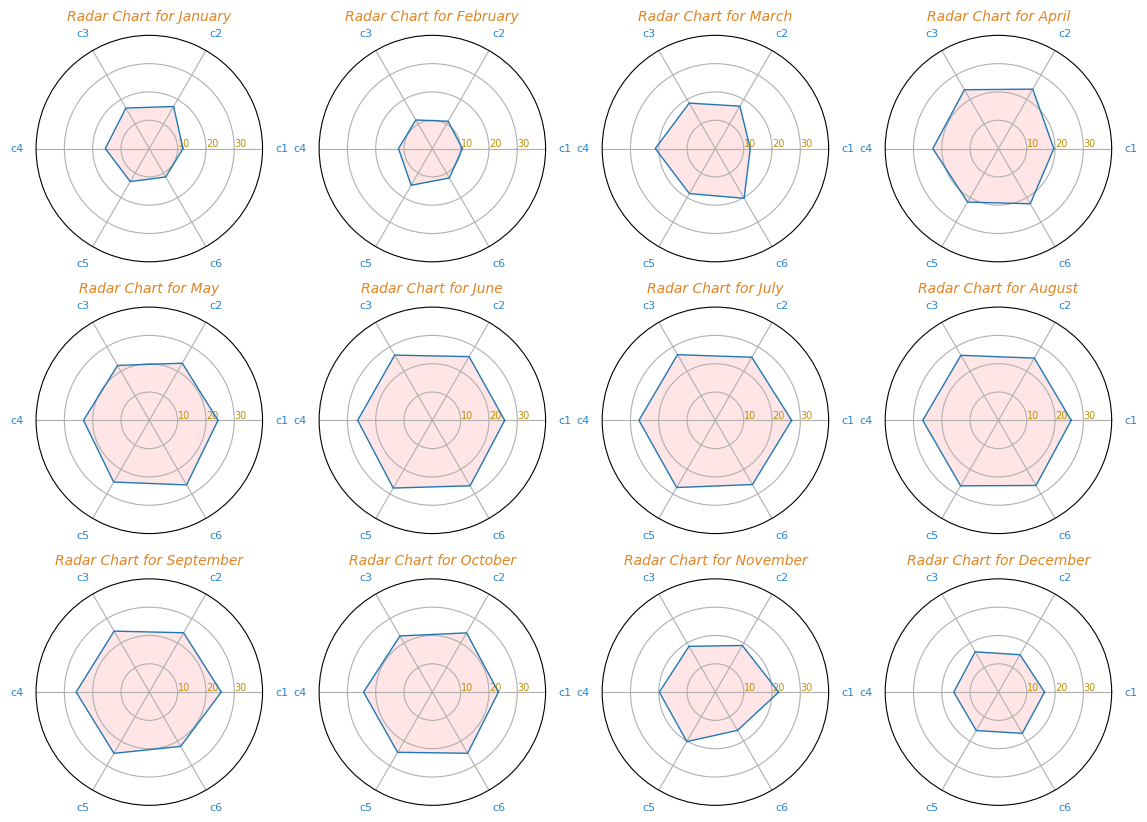

In [ ]:
number_category=6
month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
figure=plt.figure(figsize=(14,10))
# Create a radar chart for each month
for month in range(0,12):
    ax=plt.subplot(3,4,month+1,polar=True)
    angles=[n/float(number_category)*2*pi for n in range(number_category)]
    angles+=angles[:1]
    x_label=['c1',"c2",'c3','c4','c5','c6']
    y_label=["10","20","30"]
    ax.set_rlabel_position(0)
    plt.ylim(0,40)
    plt.xticks(angles[:-1],x_label,color="#2986cc",size=8)
    plt.yticks([10,20,30],y_label,color='#bf9000',size=7)
    args = np.concatenate((feature_data[month,:], feature_data[month,:1]))
    ax.plot(angles, args , linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, args, 'r', alpha=0.1)



    # Add a title for the specific month
    plt.title(f"Radar Chart for "+month_names[month],fontstyle='italic',fontsize=10,color='#e38420')

    # Display the radar chart
plt.show()

#--------------------------#
#4. Dendrogram
#--------------------------#

Now, using the dataset in exercise 3 to draw the dendrogram


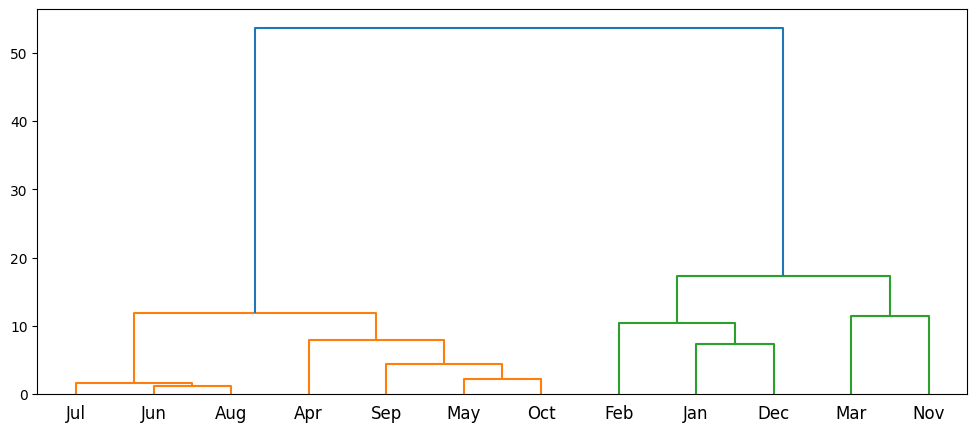


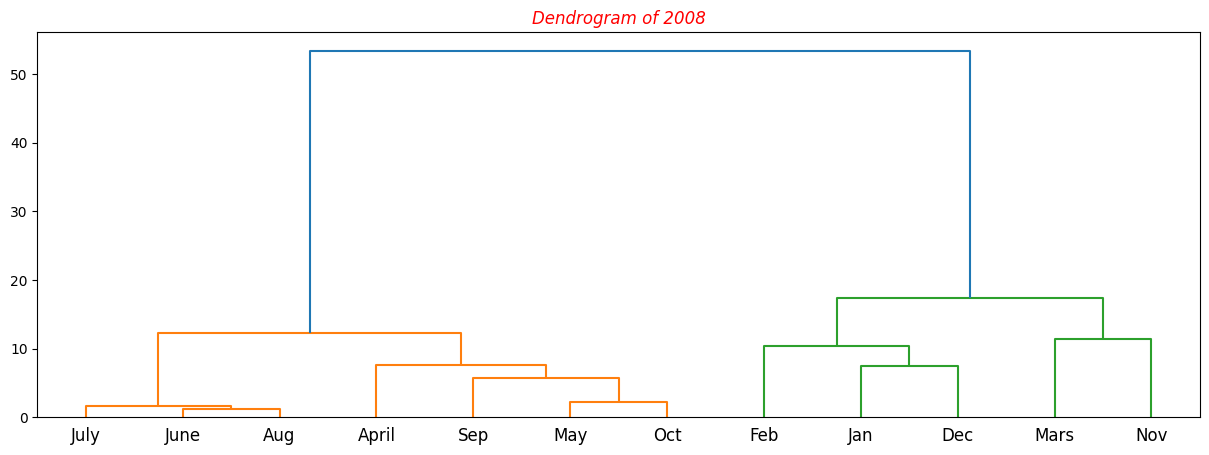

In [ ]:
#--------------------------#
#4. Dendrogram
#--------------------------#
from scipy.cluster.hierarchy import dendrogram, linkage
fig = plt.figure(figsize=(15, 5))
Z = linkage(feature_data, 'ward')
dn = dendrogram(Z,
                leaf_font_size=12,
                orientation='top',
                labels=["Jan","Feb","Mars","April","May","June","July","Aug","Sep","Oct","Nov","Dec"],
                distance_sort='ascending')
plt.title('Dendrogram of 2008',fontstyle='oblique',fontsize=12,color='red')
plt.show()
